# Shallow fully connected networks on MNIST using Keras

This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

We assume you are using TF 2. If you need to install some packages, use `pip install ...`, e.g. `pip install sklearn` for SciKit Learn.

## Loading the packages

In [73]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [74]:
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation,Conv2D,MaxPooling2D
from tensorflow.keras import utils, regularizers

from sklearn.metrics import confusion_matrix

%matplotlib inline

## Loading the raw data
First load the `mnist` dataset and normalize it to be in the range [0, 1]

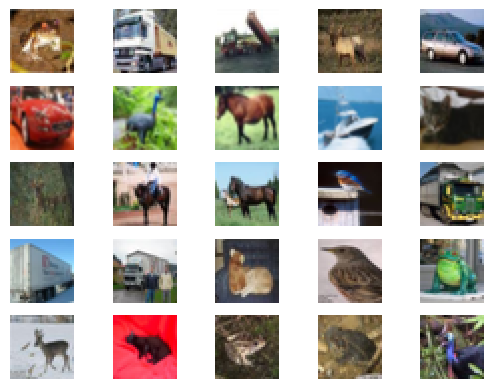

In [75]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    # show the plot
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

show_imgs(X_train)

In [76]:
print(X_train.shape[1:], X_test.shape)

(32, 32, 3) (10000, 32, 32, 3)


In [77]:
# Normalize input
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `y_train` to denote, per convention, an array with multiple dimensions.

In [78]:
n_classes = 10
# Conversion to class vectors
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(y_train[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


# One-layer network and weight visualisation
## Define the network

In [79]:
E = 30              # number of epochs
B = 128              # batch size
D = X_train.shape[1:]

model_shallow = Sequential()
# one layer network
model_shallow.add(Flatten(input_shape=(D)))
model_shallow.add(Dense(32, activation='relu') )
model_shallow.add(Dense(128, activation='relu') )
model_shallow.add(Dense(512, activation='relu') )
model_shallow.add(Dense(n_classes, activation='softmax') )
model_shallow.summary()

#Original
'''
model_cnn = Sequential()
model_cnn.add(Conv2D(32,(3,3),padding= 'same', strides=(1, 1), input_shape=(D)))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(n_classes, activation='softmax') )
model_cnn.summary()
'''

model_cnn = Sequential()
model_cnn.add(Conv2D(32,(3,3),padding= 'same', strides=(1, 1), input_shape=(D)))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Conv2D(32,(3,3),padding= 'same', strides=(1, 1), input_shape=(D)))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(n_classes, activation='softmax') )
model_cnn.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 3072)              0         
                                                                 
 dense_27 (Dense)            (None, 32)                98336     
                                                                 
 dense_28 (Dense)            (None, 128)               4224      
                                                                 
 dense_29 (Dense)            (None, 512)               66048     
                                                                 
 dense_30 (Dense)            (None, 10)                5130      
                                                                 
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_15"
________________________

## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [80]:
model = 0
if model:
    model = model_shallow
    print("using shallow model...")
else:
    model = model_cnn
    print("using CNN model...")

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))

using shallow model...
Epoch 1/30
391/391 [==============================] - 5s 11ms/step - loss: 1.8622 - accuracy: 0.3227 - val_loss: 1.7182 - val_accuracy: 0.3784
Epoch 2/30
391/391 [==============================] - 4s 10ms/step - loss: 1.7109 - accuracy: 0.3830 - val_loss: 1.6839 - val_accuracy: 0.3874
Epoch 3/30
391/391 [==============================] - 3s 9ms/step - loss: 1.6593 - accuracy: 0.4023 - val_loss: 1.6461 - val_accuracy: 0.4039
Epoch 4/30
391/391 [==============================] - 4s 9ms/step - loss: 1.6246 - accuracy: 0.4113 - val_loss: 1.6119 - val_accuracy: 0.4165
Epoch 5/30
391/391 [==============================] - 4s 9ms/step - loss: 1.5988 - accuracy: 0.4237 - val_loss: 1.5911 - val_accuracy: 0.4310
Epoch 6/30
391/391 [==============================] - 4s 9ms/step - loss: 1.5843 - accuracy: 0.4267 - val_loss: 1.6344 - val_accuracy: 0.4060
Epoch 7/30
391/391 [==============================] - 4s 10ms/step - loss: 1.5701 - accuracy: 0.4319 - val_loss: 1.5982 - v

All trainings are made with a batch size of 128 and 30 epochs.

| CNN | Architecture | Acc. train % | Acc. test %  |
|---  |---           |---           |---           |
|  1  | Layer 1 : Conv D=32, w=h=3, S=1, P='same'; <br/> Layer 2 : RELU; Layer 3: MaxPool w=h=2; <br/> Layer 4 : Flatten; <br/> Layer 5 : Dense D=10  |    0.7785    | 0.6467       |
|     |              |              |              |   
|     |              |              |              |

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

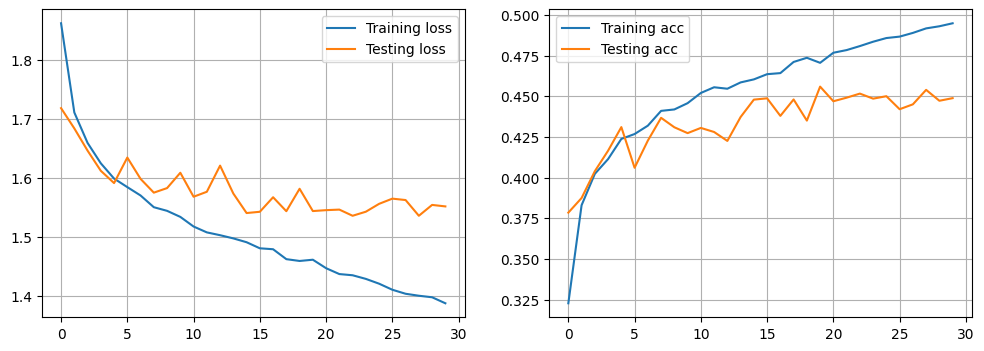

In [81]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### model_shallow evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model_shallow. The function returns the loss and the metrics used to compile the models.

In [82]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 1.5515398979187012
Test accuracy: 0.4487999975681305


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [83]:
#y_pred = model_shallow.predict_classes(X_test, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

313/313 [==============================] - 1s 3ms/step
[[511  41  65  41  30  33  31  40 166  42]
 [ 36 562  13  43  19  29  27  20  82 169]
 [ 94  34 280  76 152  86 144  76  39  19]
 [ 35  31  75 287  57 214 169  52  45  35]
 [ 60  15 131  80 342  59 187  76  32  18]
 [ 28  25  71 189  64 354 127  63  52  27]
 [  6  22  72  96  84  80 588  19  14  19]
 [ 51  28  48  87  98  90  51 459  26  62]
 [119  73  12  43  18  26  12  11 616  70]
 [ 54 181   8  38   4  25  42  45 114 489]]


### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to re-scale the weight values into 0-255 pixel values.

(3072, 32)
(32,)
(32, 128)
(128,)
(128, 512)
(512,)
(512, 10)
(10,)


ValueError: cannot reshape array of size 3072 into shape (28,28)

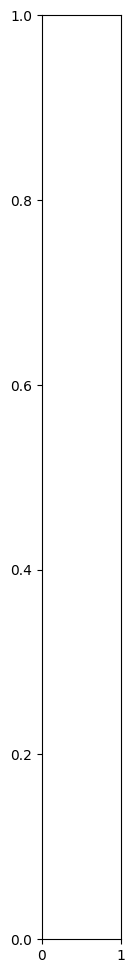

In [84]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:,i]
    im = im.reshape(28,28)
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = np.min(im)
    max = np.max(im)
    im = np.round((im - min)/(max - min) * 255).astype(int)
    ax.axis('off')
    ax.imshow(im)